In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline

# Exploratory Data Analysis with Seaborn and Pandas

## Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the Python Data Science stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes that improve on the default matplotlib aesthetics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, while the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), full customization of the figures will require a sophisticated understanding of matplotlib objects.


In [2]:
# standard import statement for seaborn
import seaborn as sns

## What is Exploratory Data Analysis (EDA)

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.  It is used to understand the data, get context about it, understand the variables and the relashionship between them, and formulate hypotheses that could be useful when building predictive models.

# Doing Exploratory Data Analysis

## Loading the data

In [3]:
housing = pd.read_csv('../data/house_train.csv')

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## The questions that will guide our analysis

All data analysis must be guided by some key questions or objectives that conduct all that we do. As example here are the two objectives that will guide our exploration of the data set:

> **1. Understand the individual variables in the dataset**

> **2. Understand how the variables in this dataset relate with the SalePrice of the house**

**Understand the data and the problem**: the more context you have, the better. It is a good idea to take a look at each variable and think about their meaning and importance for this problem.

For each variable in the dataset you should know it's **Type**. In general there are two possible types of variables: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

In [6]:
#Image("img/variable_types.png", width=500)

**Numerical variables**

- **SalePrice**
- **LotArea:** Lot size in square feet
- **OverallQual:** Rates the overall material and finish of the house
- **OverallCond:** Rates the overall condition of the house
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **YearBuilt:** Original construction date (this is not technically a numeric variable but we will use it to produce another variable called Age)

**Categorical variables**

- **MSZoning:** Identifies the general zoning classification of the sale.
- **LotShape:** General shape of property
- **Neighborhood:** Physical locations within Ames city limits
- **CentralAir:** Central air conditioning
- **SaleCondition:** Condition of sale
- **MoSold:** Month Sold (MM)
- **YrSold:** Year Sold (YYYY)

In [7]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [8]:
housing = housing[numerical_vars+categorical_vars]

In [9]:
housing.shape

(1460, 15)

## Understanding the main variable

In [10]:
#descriptive statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

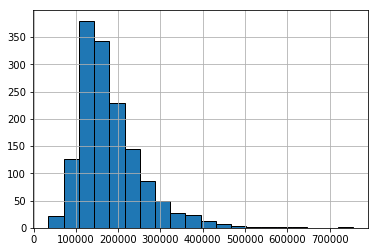

In [11]:
housing['SalePrice'].hist(edgecolor='black', bins=20);

In [12]:
#skewness and kurtosis
print("Skewness: {:0.3f}".format(housing['SalePrice'].skew()))
print("Kurtosis: {:0.3f}".format(housing['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


## Numerical variables

In [13]:
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


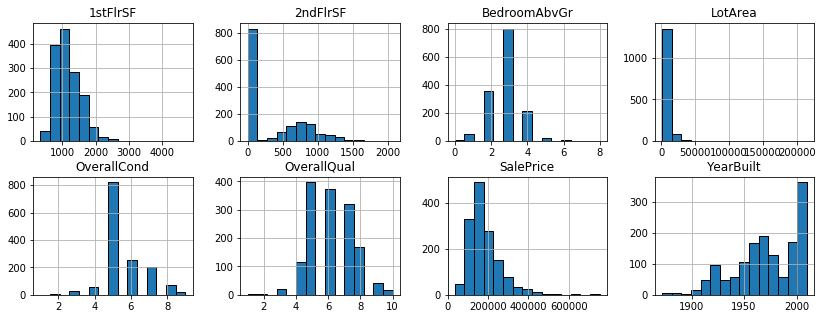

In [14]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

What can we see from this picture:

1. The distribution of sizes of the first floor is skewed to the right. This is expected, there a a few big houses.
2. There is a big peack at zero in the 2ndFlrSF variable. Those are the variables that don't have a second floor, so we can identify a new variable from this one.
3. Most houses have 3 bedrooms.
4. The lot area is highly skewed: there few houses with a large lot area.
5. The ratings for conditions and quality tend to be around 5, few houses have very high or low ratings.
6. The `YearBuilt` variable is actually not useful in the present form. However we can use it to construct a variable that actually make sense: Age of the house at the time o the sale.

In [15]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

Now, it is very clear now that many houses where new when they were sold.

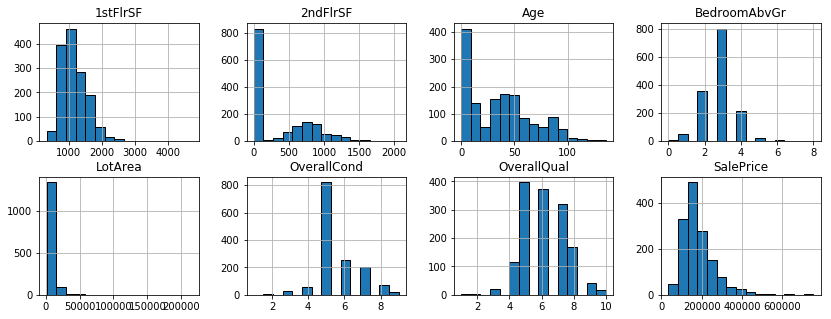

In [16]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

## Categorical variables

When examining categorical variables we want to see the distribution of observations in the different categories.

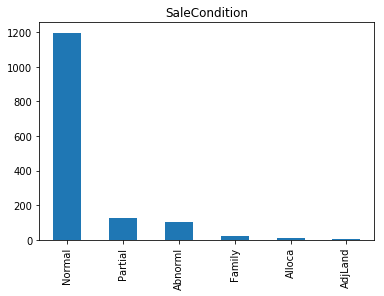

In [17]:
housing['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition');

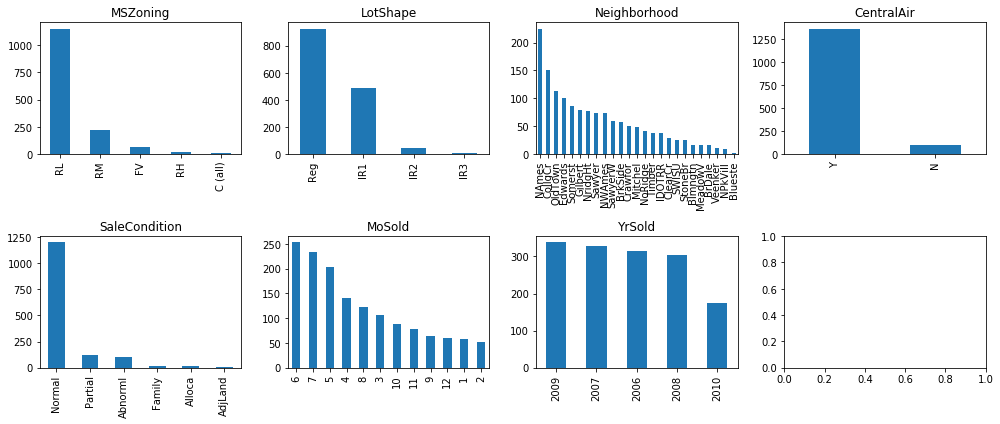

In [18]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

In [19]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [20]:
levels_to_keep = housing[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [21]:
for var in categorical_vars:
    housing = housing.loc[housing[var].isin(levels_to_keep[var])]

In [22]:
housing.shape

(1246, 16)

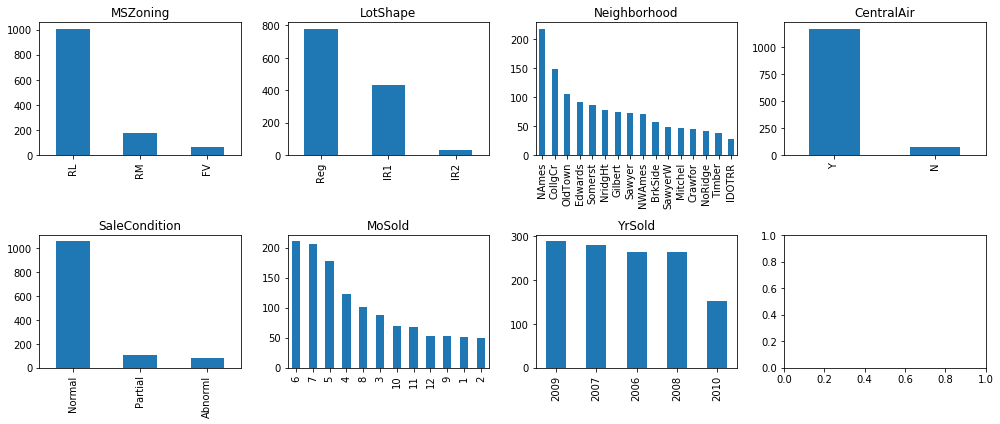

In [23]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

## Relationships between numerical variables

The seaborn library excels when we want to investigate relationship between variables, with very few lines of code we can get very informative plots and discover patterns and relationships between our variables.

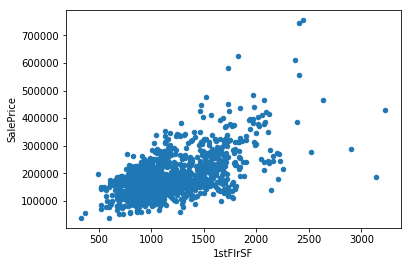

In [24]:
housing.plot.scatter(x='1stFlrSF', y='SalePrice');

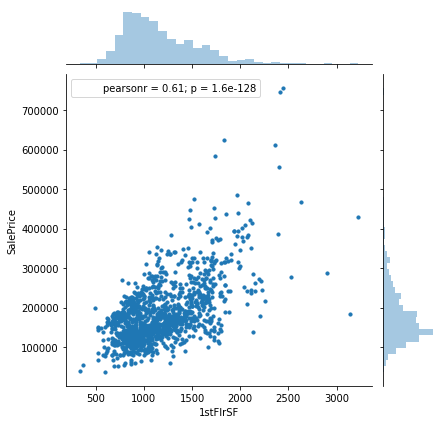

In [25]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing, joint_kws={"s": 10});

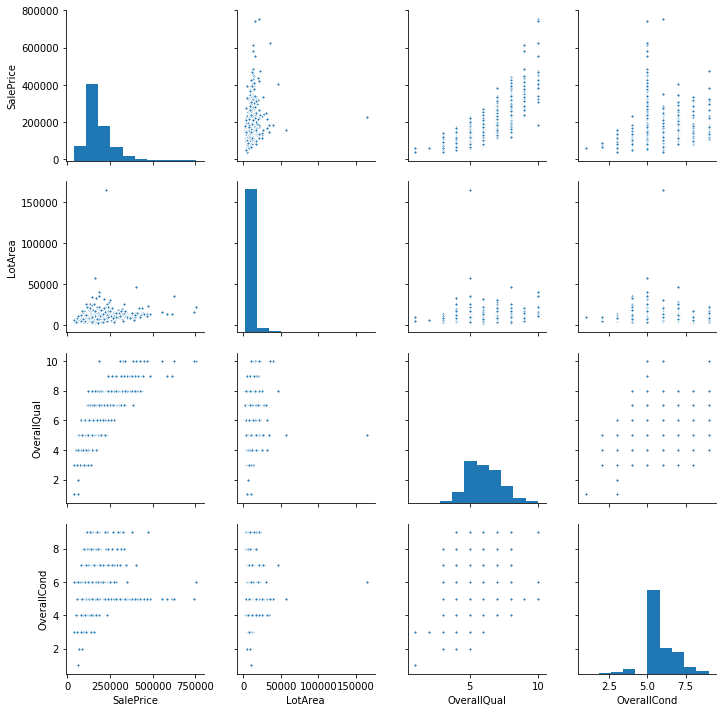

In [26]:
sns.pairplot(housing[numerical_vars[:4]], plot_kws={"s": 10});

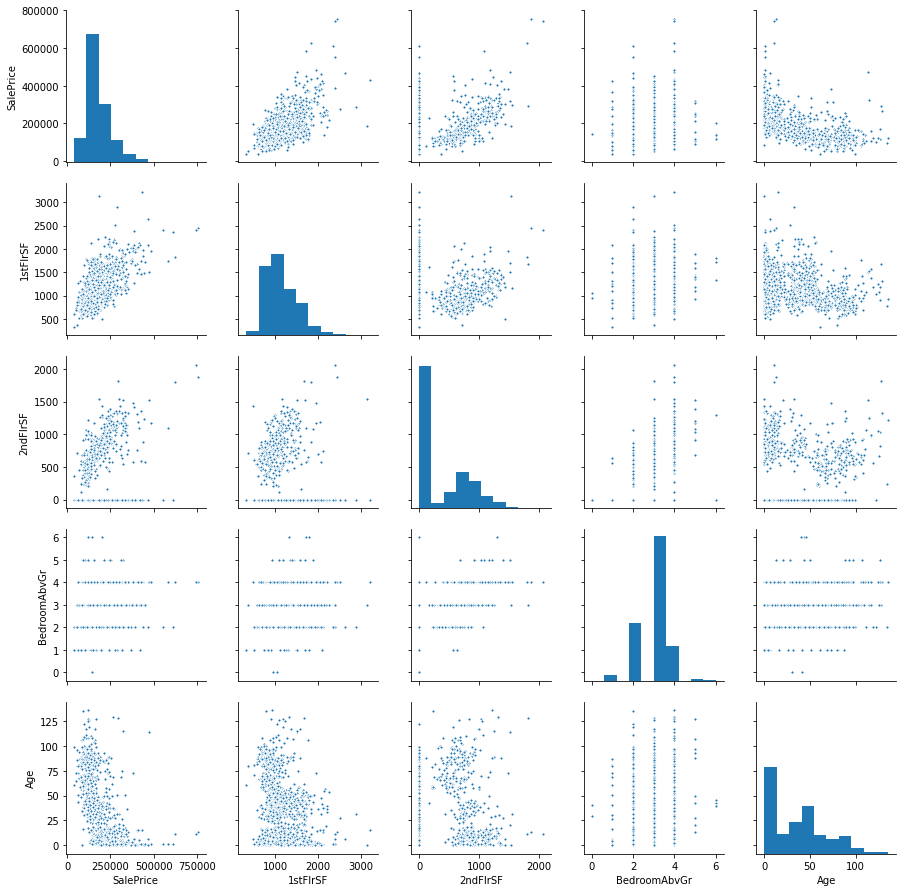

In [27]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={"s": 10});

In [28]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


In [29]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.803188
1stFlrSF        0.611263
2ndFlrSF        0.354388
LotArea         0.264047
BedroomAbvGr    0.218890
OverallCond    -0.101111
Age            -0.530739
Name: SalePrice, dtype: float64

In [30]:
correlations = housing[numerical_vars].corr()

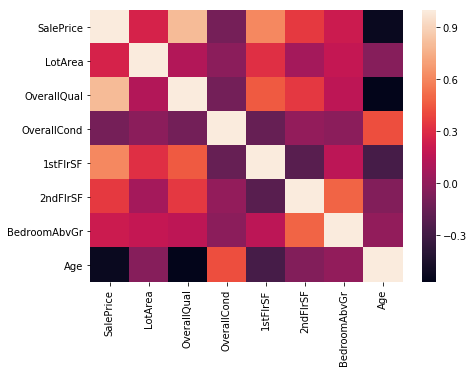

In [31]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Relationship of SalePrice with categorical variables

Here we are interested in the relashionship between the categorical variables in our dataset and the SalePrice of the house. The standard plot to examine the relashionship between a numerical and a categorical variable is the **boxplot**. A boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

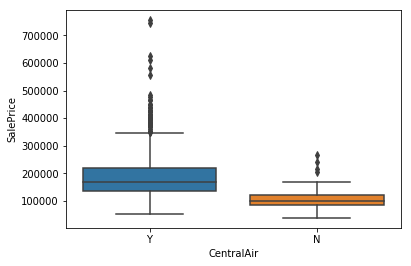

In [32]:
sns.boxplot(x='CentralAir', y='SalePrice', data=housing);

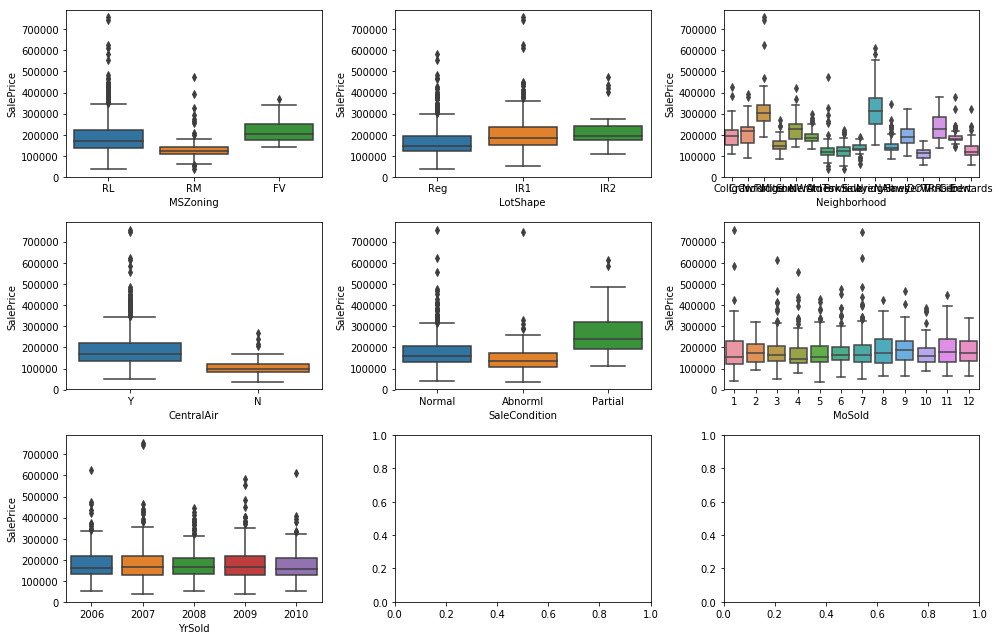

In [33]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

fig.tight_layout()

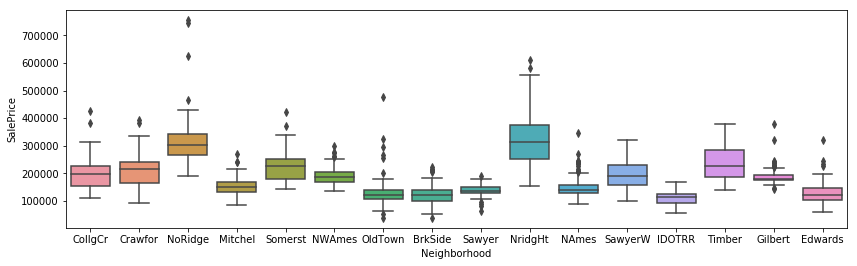

In [34]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);

In [35]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

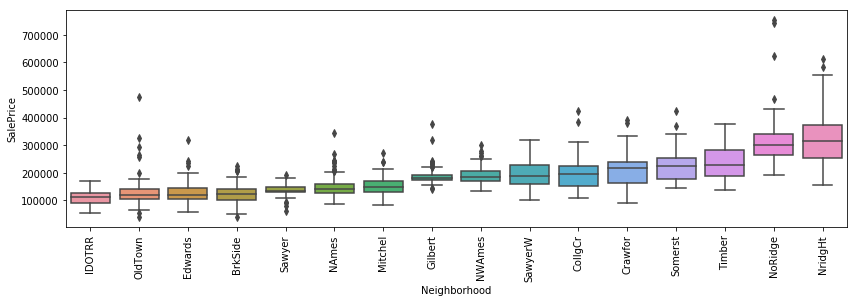

In [36]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

## More complex plots

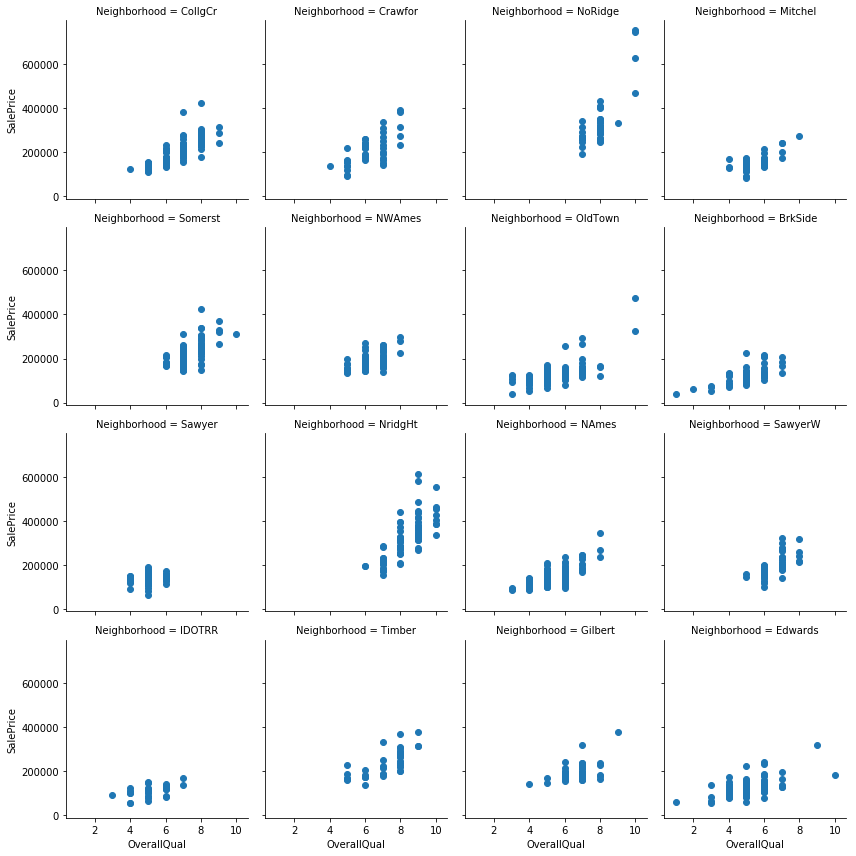

In [37]:
conditional_plot = sns.FacetGrid(housing, col="Neighborhood", col_wrap=4)
conditional_plot.map(plt.scatter, "OverallQual", "SalePrice");

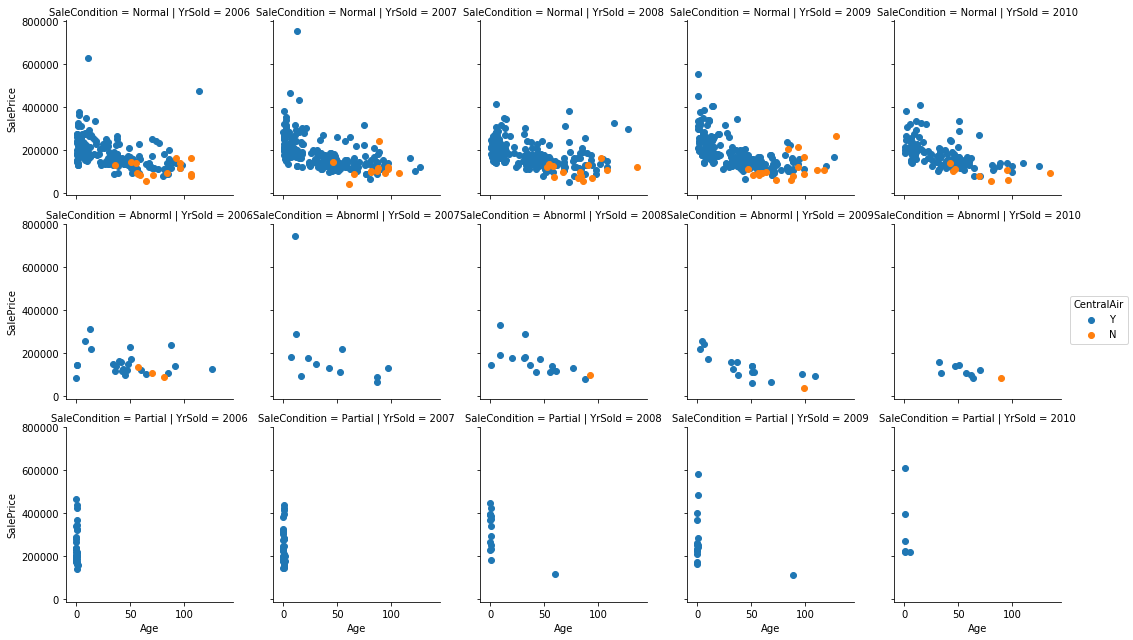

In [38]:
conditional_plot = sns.FacetGrid(housing, col="YrSold", row="SaleCondition", hue='CentralAir')
conditional_plot.map(plt.scatter, "Age", "SalePrice").add_legend();